# K-Means CLustering

In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

sns.set()


In [26]:
points, cluster_indexes = make_blobs(n_samples=300, cluster_std=0.8, centers=4, random_state=0)

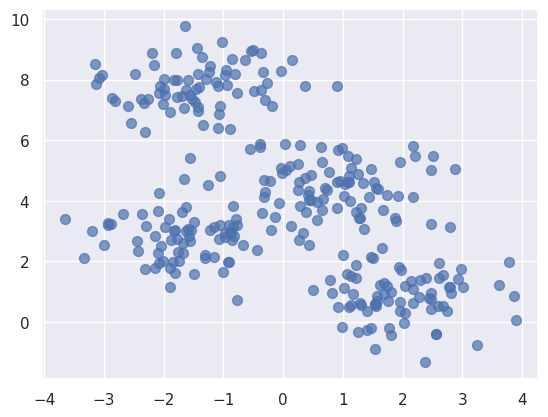

In [27]:
x = points[:,0]
y = points[:,1]
plt.scatter(x,y, s=50, alpha=0.7)

In [28]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(points)
pred_cluster_indexes = kmeans.predict(points)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
kmeans.cluster_centers_

array([[ 1.97899828,  0.83487115],
       [ 0.85491787,  4.44098171],
       [-1.65917487,  2.7607673 ],
       [-1.44074146,  7.78059306]])

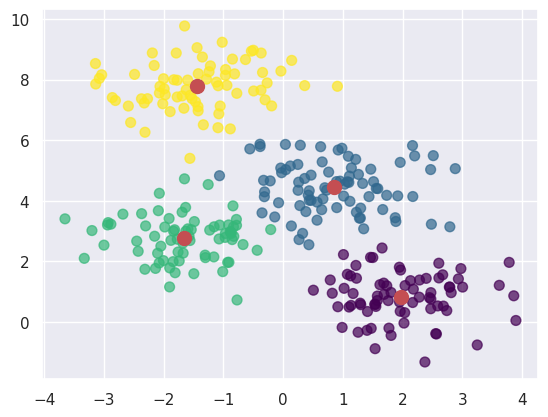

In [30]:
plt.scatter(x,y, c=pred_cluster_indexes, s=50, alpha=0.7, cmap="viridis")
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c="r", s=100)

In [31]:
!wget -P sample_data https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv

--2024-05-15 11:25:10--  https://raw.githubusercontent.com/jeffprosise/Applied-Machine-Learning/main/Chapter%201/Data/customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3780 (3.7K) [text/plain]
Saving to: ‘sample_data/customers.csv.1’

customers.csv.1     100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-05-15 11:25:10 (51.7 MB/s) - ‘sample_data/customers.csv.1’ saved [3780/3780]



In [32]:
import pandas as pd

customers = pd.read_csv("sample_data/customers.csv")
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Text(0, 0.5, 'Spending Score')

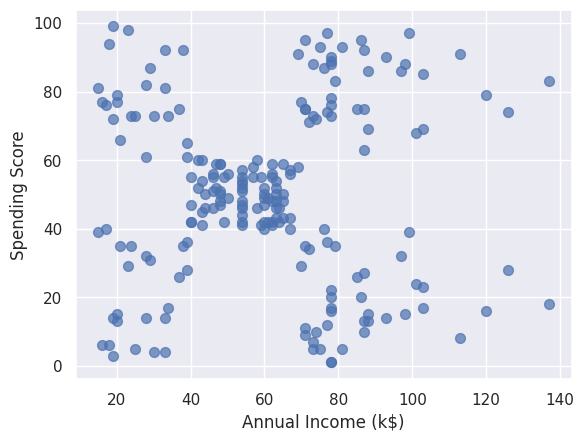

In [33]:
points = customers.iloc[:,3:5].values
x = points[:,0]
y = points[:,1]

plt.scatter(x,y, s=50, alpha=0.7)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


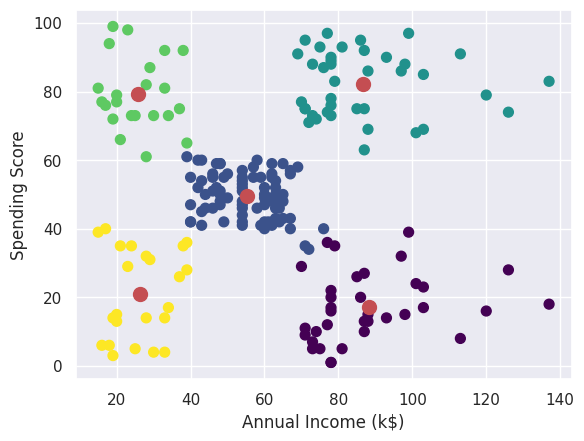

In [34]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)
pred_cluster_indexes = kmeans.predict(points)

plt.scatter(x,y, s=50, c=pred_cluster_indexes, cmap="viridis")
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], s=100, c="r")

In [35]:
df = customers.copy()
df['Cluster'] = pred_cluster_indexes
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [36]:
import numpy as np

cluster = kmeans.predict(np.array([[120,20]]))[0]

clustered_df = df[df["Cluster"] == cluster]

# clustered_df.values

## Clustering with more than two features

In [37]:
from sklearn.preprocessing import LabelEncoder

df = customers.copy()
encoder = LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

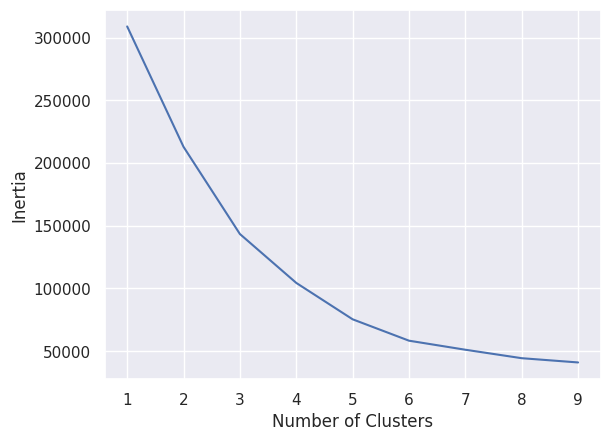

In [38]:
inertias = []
points = df.iloc[:,1:5].values

for i in range(1,10):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(points)
  inertias.append(kmeans.inertia_)

plt.plot(range(1,10), inertias)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(points)

pred_cluster_indexes = kmeans.predict(points)
df["Cluster"] = pred_cluster_indexes
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,4
2,3,0,20,16,6,0
3,4,0,23,16,77,4
4,5,0,31,17,40,0


In [40]:
kmeans.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739]])

In [43]:
results = pd.DataFrame(columns = ['Cluster', 'Average Age', 'Average Income', 'Average Spending Index', 'Number of Females', 'Number of Males'])

for i, center in enumerate(kmeans.cluster_centers_):
  age = center[1]
  income = center[2]
  spend = center[3]

  gdf = df[df["Cluster"] == i]
  females = gdf[gdf["Gender"] == 0].shape[0]
  males = gdf[gdf["Gender"] == 1].shape[0]

  results.loc[i] = ([i, age, income, spend, females, males])

results.head()

,Cluster,Average Age,Average Income,Average Spending Index,Number of Females,Number of Males
0,0.0,45.217391,26.304348,20.913043,14.0,9.0
1,1.0,32.692308,86.538462,82.128205,21.0,18.0
2,2.0,43.088608,55.291139,49.569620,46.0,33.0
3,3.0,40.666667,87.750000,17.583333,17.0,19.0
4,4.0,25.521739,26.304348,78.565217,14.0,9.0
